In [1]:
import pandas as pd
import math
from path import Path

In [2]:
def read_data(stock_csv, predict_csv):
    file_path1 = Path(stock_csv)
    df_stock = pd.read_csv(file_path1)
    file_path2 = Path(predict_csv)
    df_prediction = pd.read_csv(file_path2)
    
    df = df_stock.merge(df_prediction, on='Date')
    
    return df

In [3]:
def try_invest_strategy(starting_capital, df):   
    end_capital = [
        {
               "Date": "2021-12-01",
                "Capital": starting_capital
        }
    ]
    for index, row in df.iterrows():
        if(row["Predicted"] > row["Open"]):
            stocks_bought = math.floor(end_capital[-1]["Capital"] / row["Open"])
            capital_left = end_capital[-1]["Capital"] - stocks_bought * row["Open"]
            end_capital.append({
                "Date": row["Date"],
                "Capital": capital_left + stocks_bought * row["Close"]
            })

    capital_df = pd.DataFrame (end_capital, columns = ['Date', "Capital"])

    capital_df.head()
    
    return capital_df

In [4]:
def plot_capital(capital_df):   
    capital_df.plot(x='Date', y='Capital')

In [8]:
aapl_df = read_data("../stock_data/aapl.csv", "../ML_models/LSTM_predictions/aapl_predictions")
btc_df = read_data("../stock_data/btc.csv", "../ML_models/LSTM_predictions/btc_predictions")
msft_df = read_data("../stock_data/msft.csv", "../ML_models/LSTM_predictions/msft_predictions")
nflx_df = read_data("../stock_data/nflx.csv", "../ML_models/LSTM_predictions/nflx_predictions")
pfe_df = read_data("../stock_data/pfe.csv", "../ML_models/LSTM_predictions/pfe_predictions")
tsla_df = read_data("../stock_data/tsla.csv", "../ML_models/LSTM_predictions/tsla_predictions")

In [6]:
capital_aapl = try_invest_strategy(1000, aapl_df)

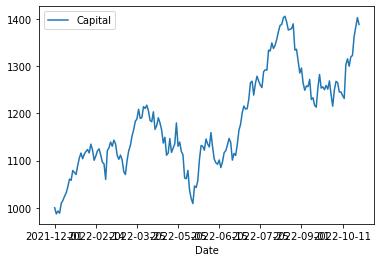

In [7]:
plot_capital(capital_aapl)